In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [7]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

In [9]:
iris_df = iris_df[iris_df['target'] != 2]

In [11]:
X = iris_df.iloc[:,:4].values
y = iris_df['target'].values

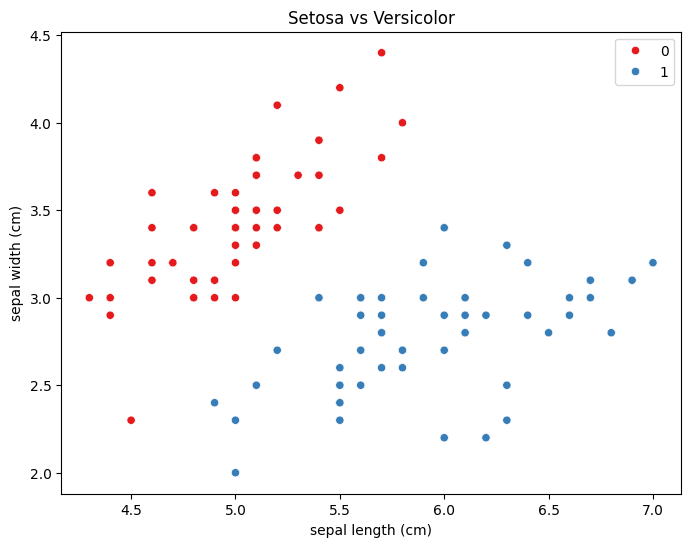

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=y, palette='Set1')
plt.title('Setosa vs Versicolor')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

print("Built-in Perceptron Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))
print("F1 Score:", f1_score(y_test, y_pred_sklearn))

Built-in Perceptron Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [15]:
class PerceptronScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Convert labels to -1 and 1
        y = np.where(y == 0, -1, 1)

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = np.sign(linear_output)
                if target != y_pred:
                    self.weights += self.lr * target * xi
                    self.bias += self.lr * target

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

In [16]:
perceptron = PerceptronScratch()
perceptron.fit(X_train, y_train)
y_pred_scratch = perceptron.predict(X_test)

print("\nCustom Perceptron Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall:", recall_score(y_test, y_pred_scratch))
print("F1 Score:", f1_score(y_test, y_pred_scratch))


Custom Perceptron Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
